## 1. Import Modules

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Reading Datasets

In [ ]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
lead_df.shape

(9240, 37)

## 3.Understanding Dataset

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 4. Data Cleaning and Preparation

In [ ]:
N_P_lead_df = round(lead_df.isnull().sum()/len(lead_df.index)*100,2).sort_values(ascending=False)
N_P_lead_df

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

## 5. Drop the Columns with >20% Null Values

In [ ]:
lead_df_col20 = N_P_lead_df[N_P_lead_df>20]
lead_df_col20

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
dtype: float64

In [ ]:
lead_df_col20.index

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags', 'Lead Profile',
       'What matters most to you in choosing a course',
       'What is your current occupation', 'Country',
       'How did you hear about X Education'],
      dtype='object')

In [ ]:
drop_col20 = ['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags', 'Lead Profile',
       'What matters most to you in choosing a course',
       'What is your current occupation', 'Country',
       'How did you hear about X Education']

In [ ]:
lead_df.drop(labels = drop_col20, axis=1, inplace = True)
lead_df.shape

(9240, 26)

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [ ]:
N_P_lead_df = round(lead_df.isnull().sum()/len(lead_df.index)*100,2).sort_values(ascending=False)
N_P_lead_df

Specialization                              15.56
City                                        15.37
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
Newspaper                                    0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Magazine                                     0.00
X Education Forums                           0.00
Newspaper Article                            0.00
Lead Number                                  0.00
Search                                       0.00


## 6. Handling Missing Values

##### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

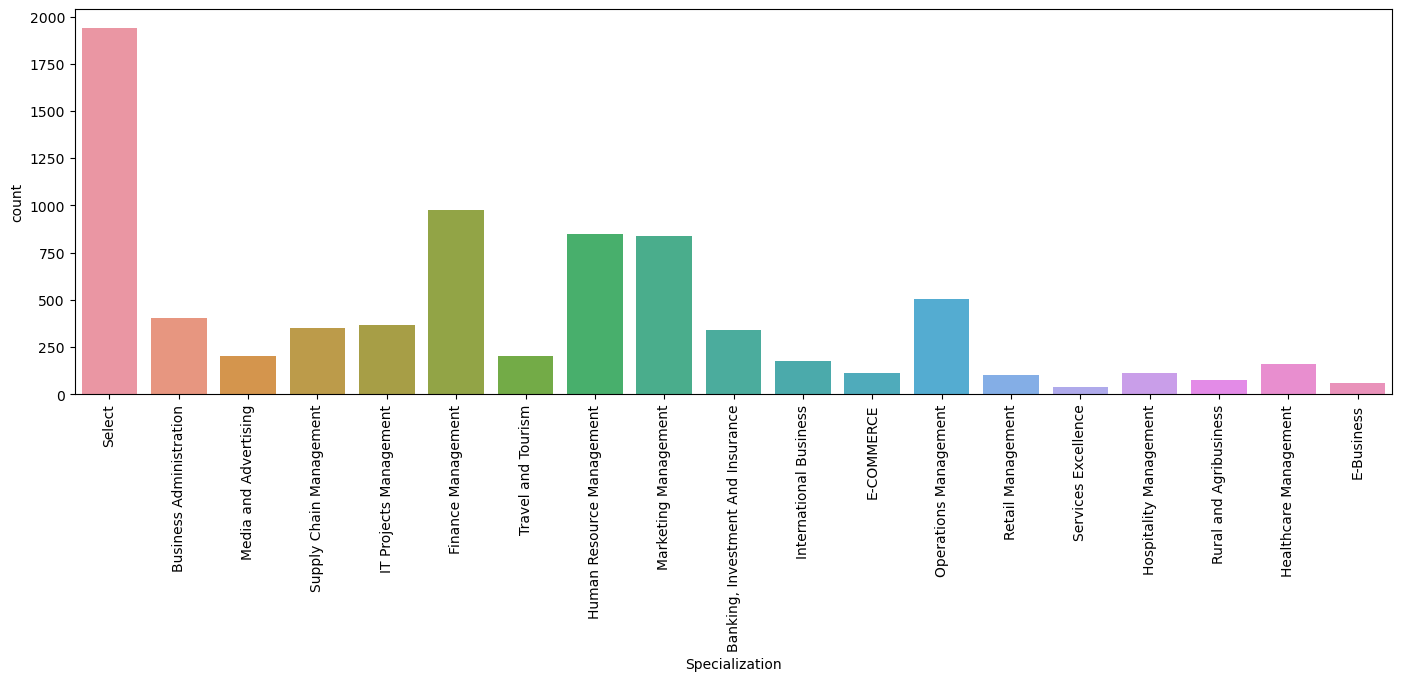

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)

In [ ]:
lead_df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                              1438
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply 

In [ ]:
# Creating a separate category called 'Others' for this 
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

##### City

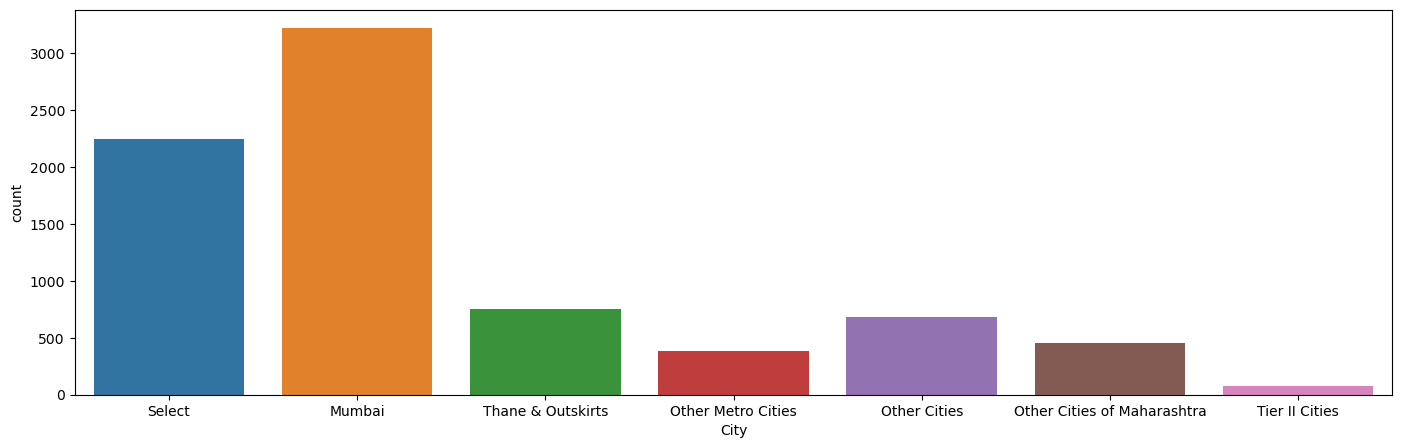

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(lead_df['City'])
plt.show()

In [ ]:
# Replace the Null value with 'Mumbai'
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

In [ ]:
# Drop the null values rows in the column 'Lead Source', 'TotalVisits' ,'Page Views Per Visit ','Last Activity' as the
# Missing values are less.

lead_df.dropna(inplace = True)

In [ ]:
lead_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

## 7. Identifying Outliers

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cont_D_cols = lead_df.select_dtypes(include=numerics)

In [ ]:
cont_D_cols.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [ ]:
objects = ['object']
cat_D_cols = lead_df.select_dtypes(include=objects)

In [ ]:
cat_D_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
lead_df.shape

(9074, 26)

In [ ]:
cont_D_cols = ['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']
cat_D_cols = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
id_cols=['Prospect ID']
len(cont_D_cols)+len(cat_D_cols)+len(id_cols)

26

Boxplot of Lead Number


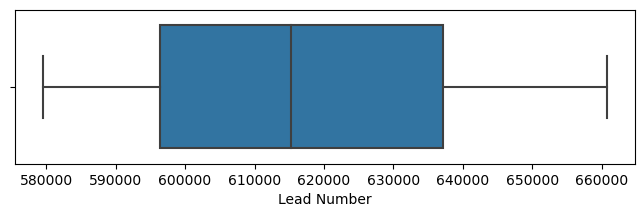

Boxplot of Converted


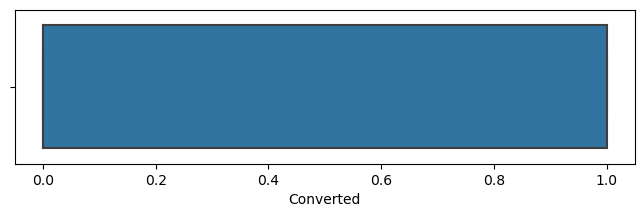

Boxplot of TotalVisits


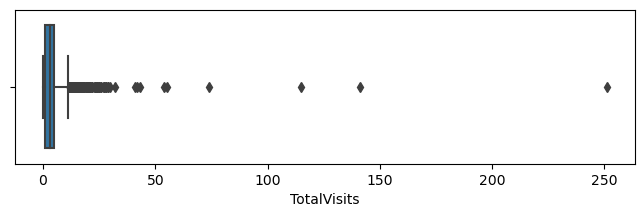

Boxplot of Total Time Spent on Website


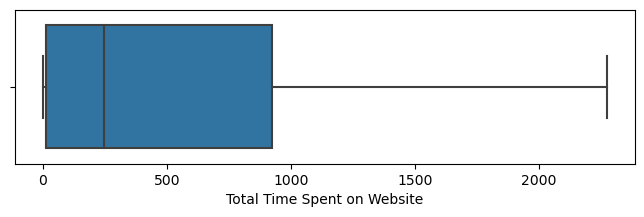

Boxplot of Page Views Per Visit


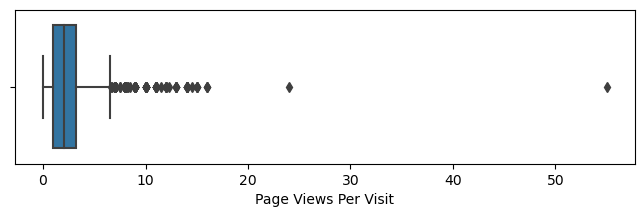

In [ ]:
for i in cont_D_cols:
    plt.figure(figsize=[8,2])
    print("Boxplot of",i)
    sns.boxplot(lead_df[i])
    plt.show()

In [ ]:
# As we can see there are a number of outliers in the 'TotalVisits' &'Page Views Per Visit' data. 
# We will cap the outliers to 95% value for analysis.

percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [ ]:
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

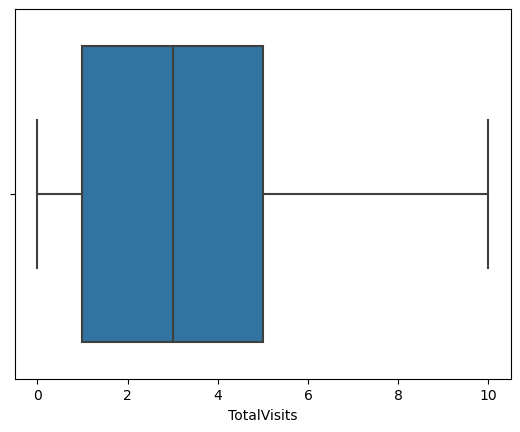

In [ ]:
sns.boxplot(lead_df['TotalVisits'])

<AxesSubplot:xlabel='Page Views Per Visit'>

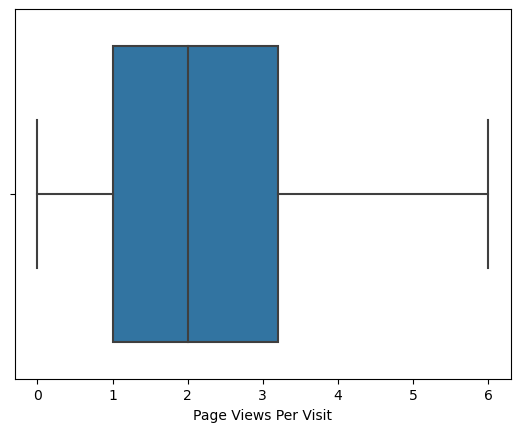

In [ ]:
sns.boxplot(lead_df['Page Views Per Visit'])

Histogram of Lead Number


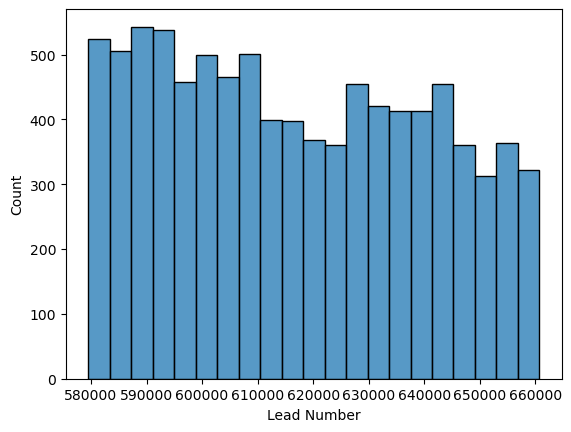

Histogram of Converted


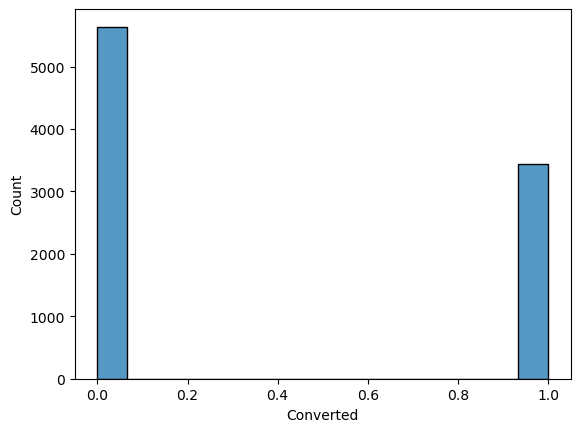

Histogram of TotalVisits


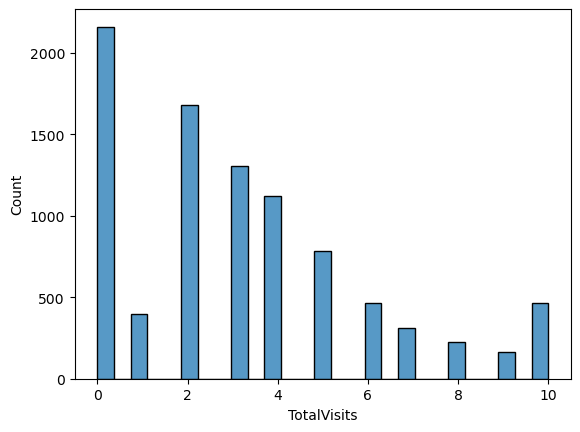

Histogram of Total Time Spent on Website


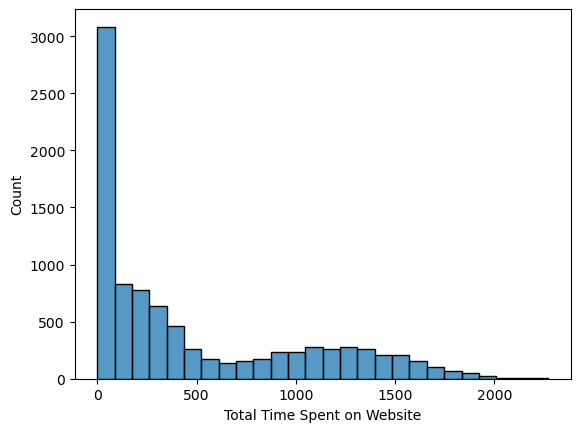

Histogram of Page Views Per Visit


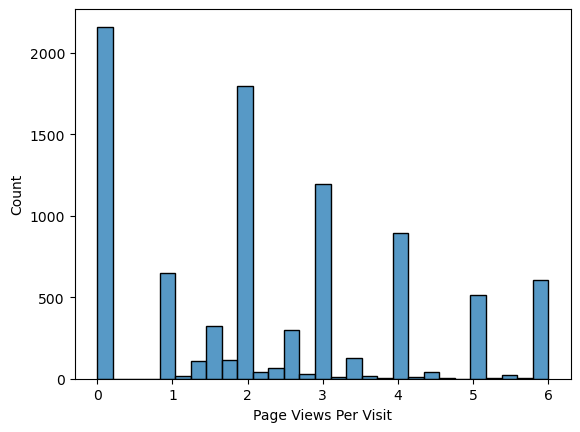

In [ ]:
for i in cont_D_cols:
    print("Histogram of",i)
    sns.histplot(lead_df[i])
    plt.show()

Countplot of Lead Origin


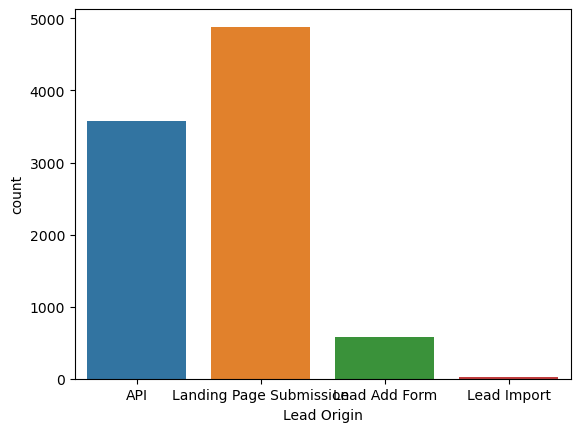

Countplot of Lead Source


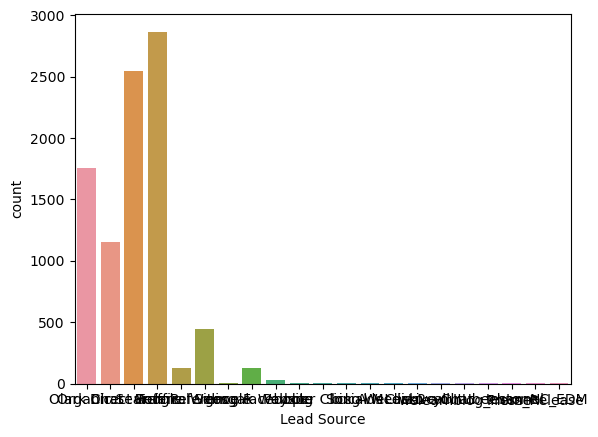

Countplot of Do Not Email


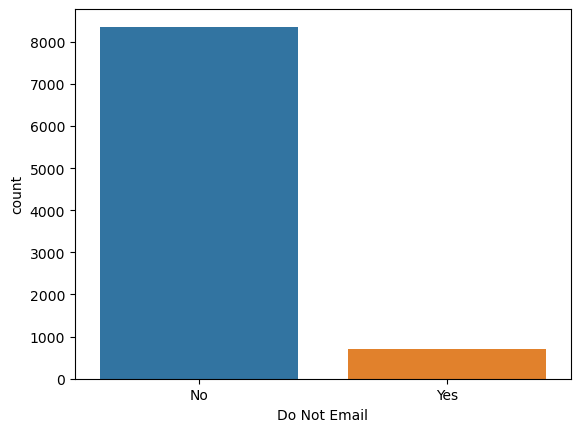

Countplot of Do Not Call


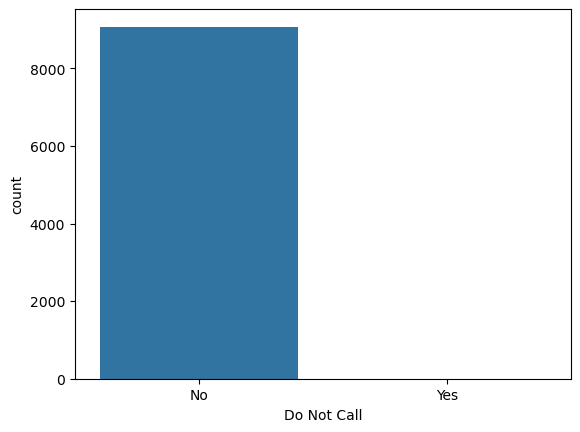

Countplot of Last Activity


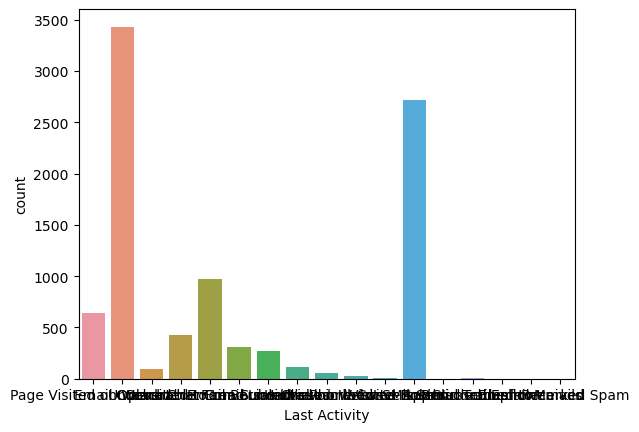

Countplot of Specialization


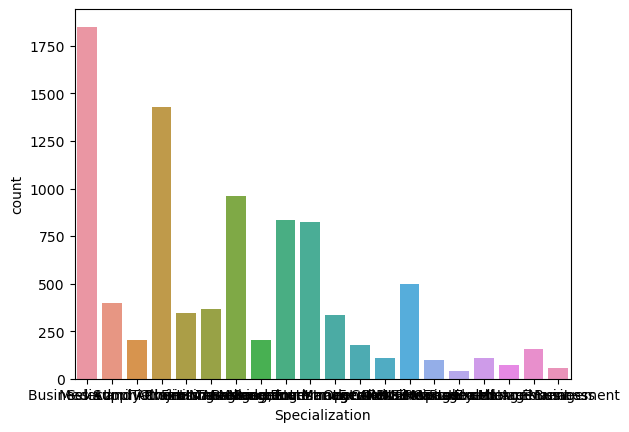

Countplot of Search


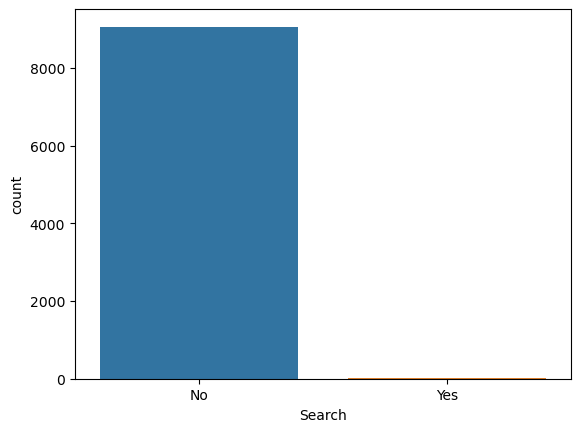

Countplot of Magazine


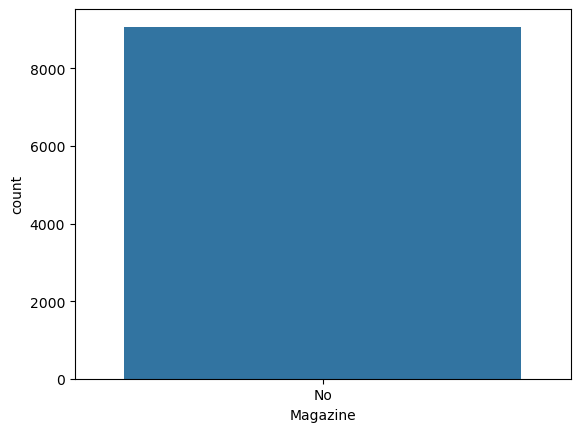

Countplot of Newspaper Article


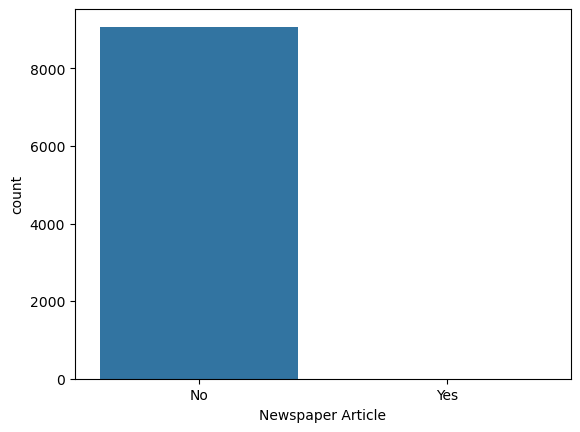

Countplot of X Education Forums


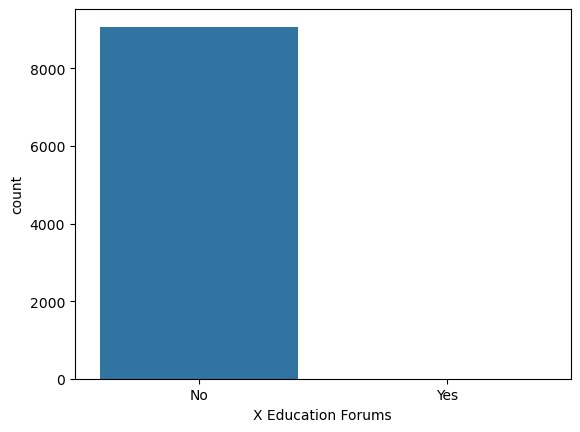

Countplot of Newspaper


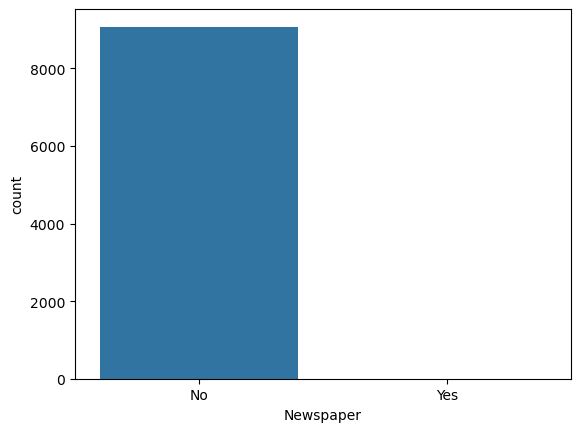

Countplot of Digital Advertisement


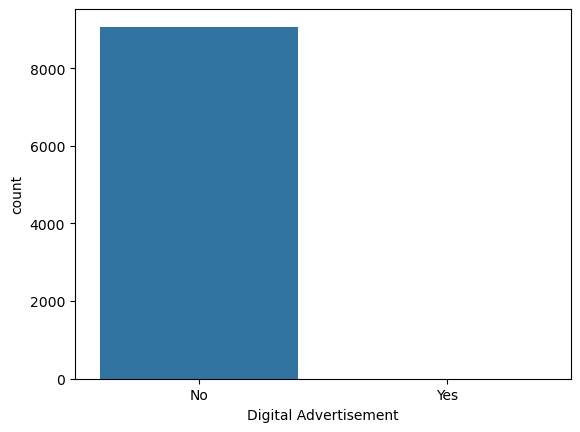

Countplot of Through Recommendations


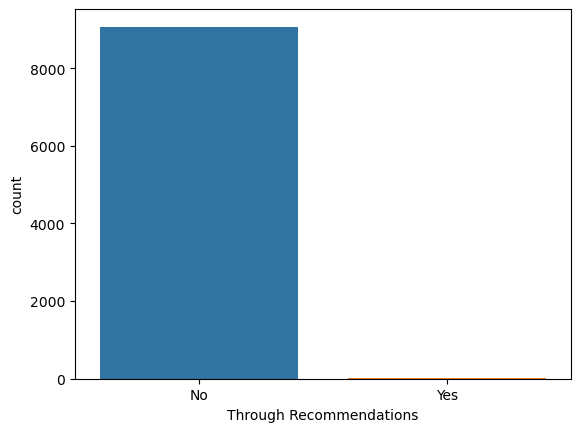

Countplot of Receive More Updates About Our Courses


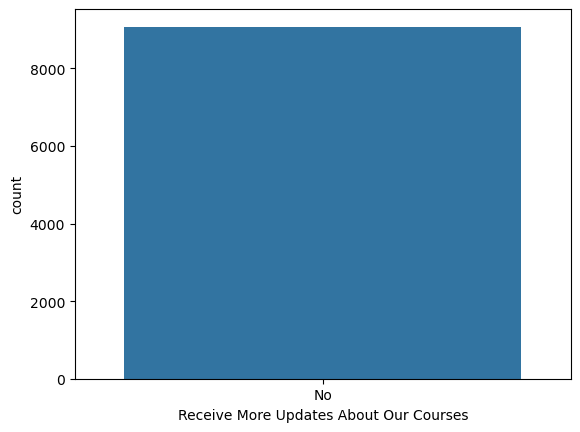

Countplot of Update me on Supply Chain Content


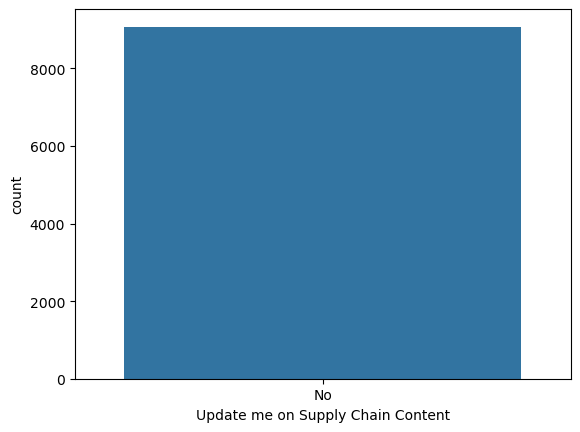

Countplot of Get updates on DM Content


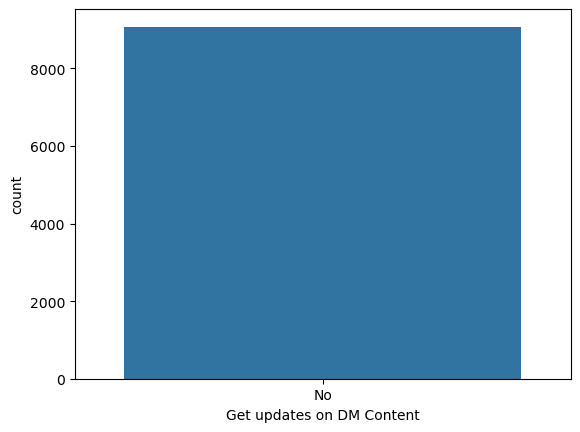

Countplot of City


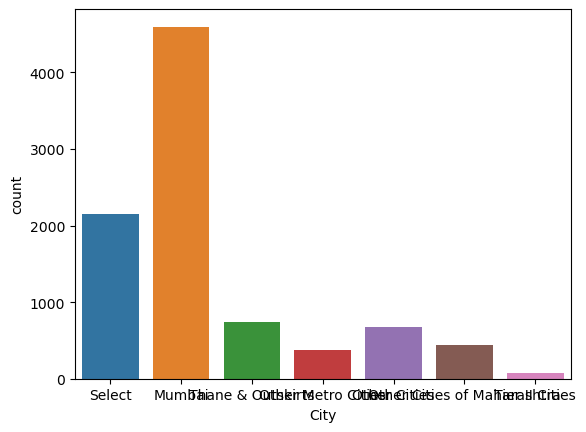

Countplot of I agree to pay the amount through cheque


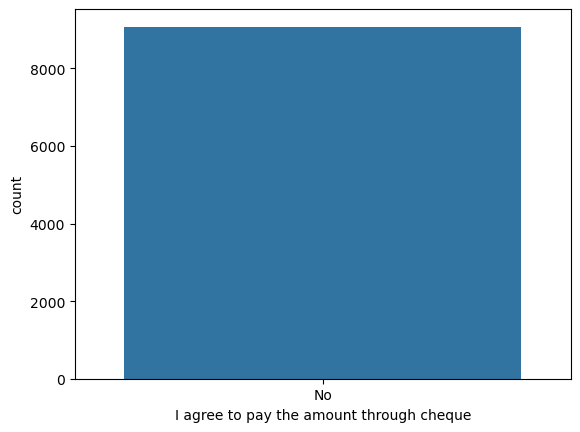

Countplot of A free copy of Mastering The Interview


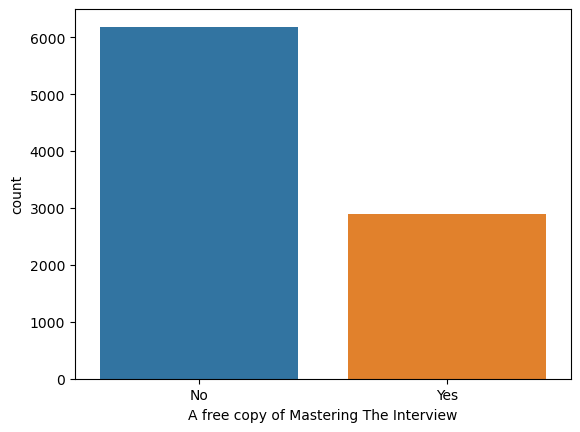

Countplot of Last Notable Activity


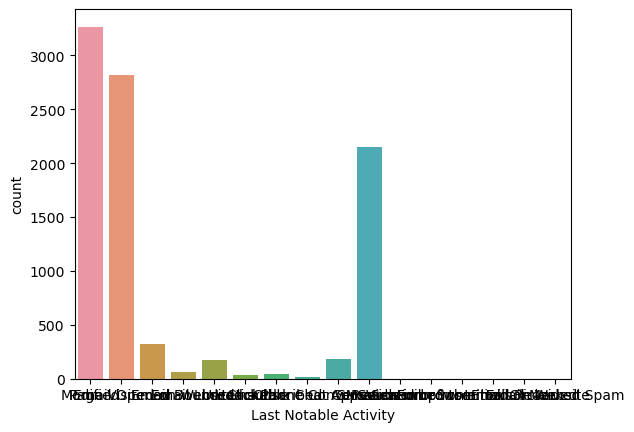

In [ ]:
for i in cat_D_cols:
    print("Countplot of",i)
    sns.countplot(lead_df[i])
    plt.show()

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

## 8. Univariate Analysis and Bivariate Analysis

##### 1. Converted
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [ ]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

##### 2. Lead Origin 

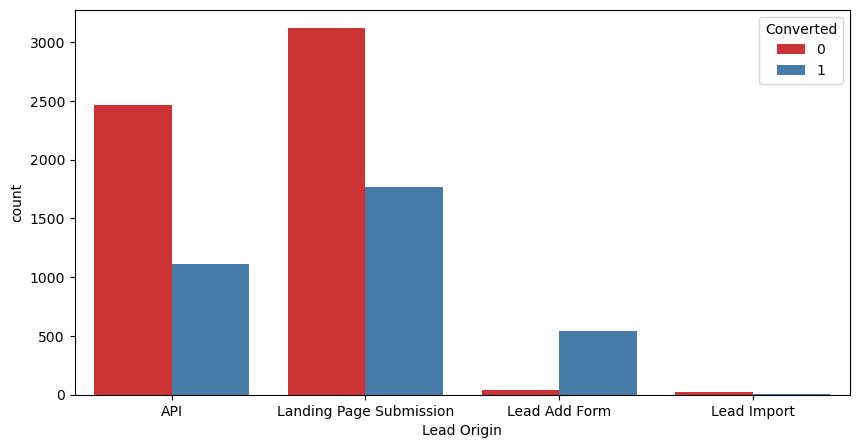

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df,palette='Set1')
plt.show()

##### 3. Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

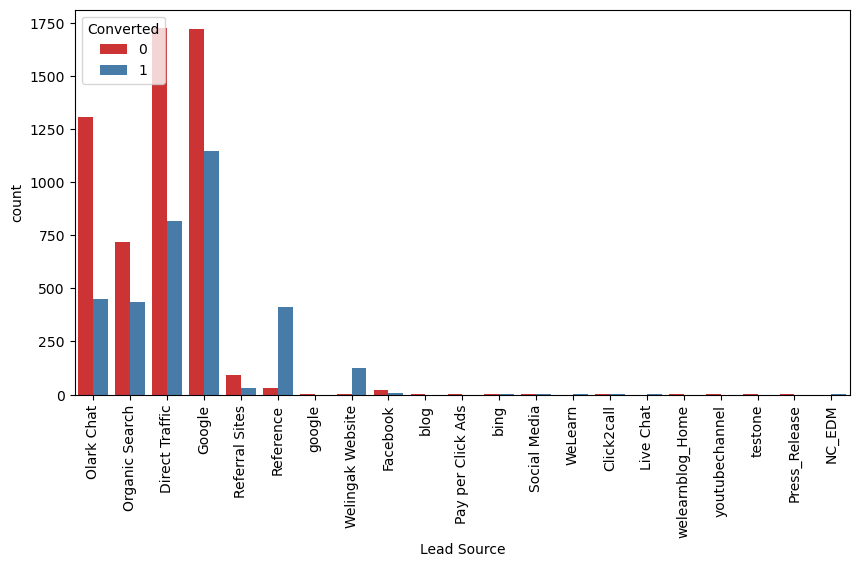

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation=90)

In [ ]:
# Need to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [ ]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

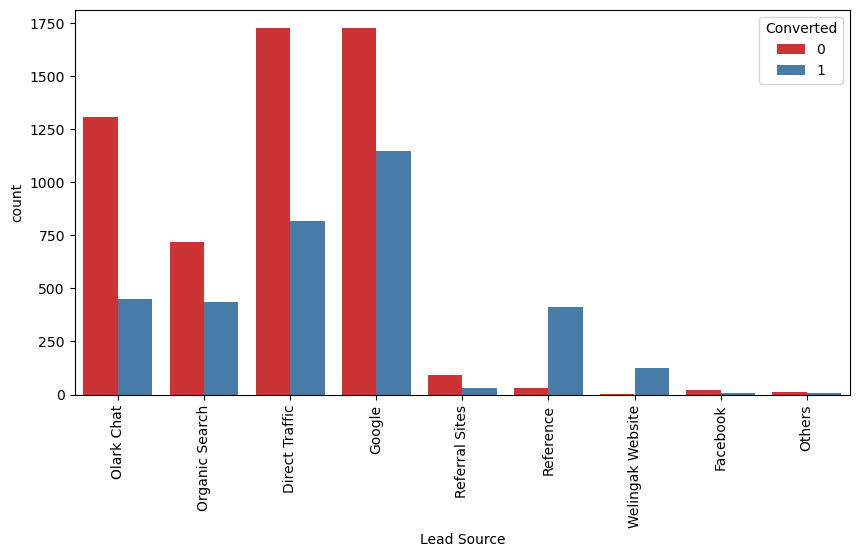

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation=90)

##### 4. Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

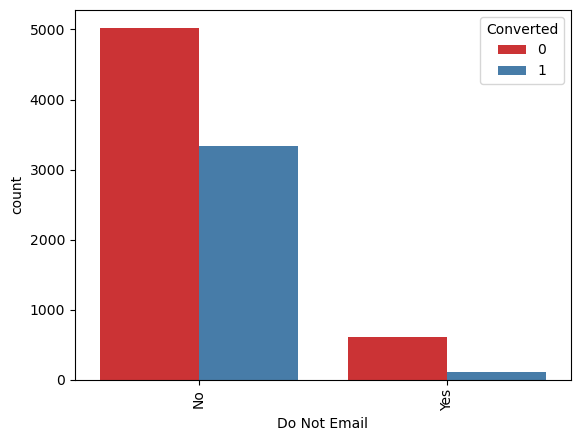

In [ ]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

##### 5. Do not call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

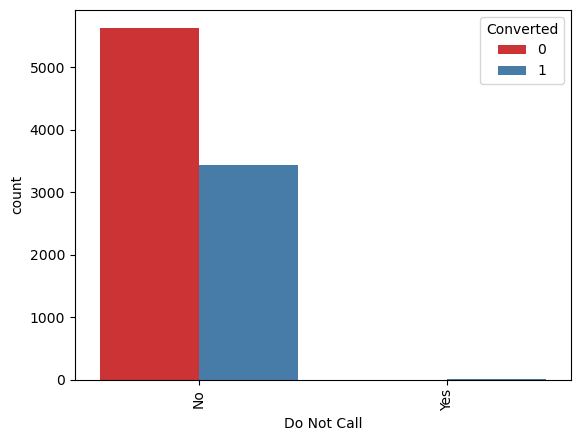

In [ ]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

##### 6. TotalVisits

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

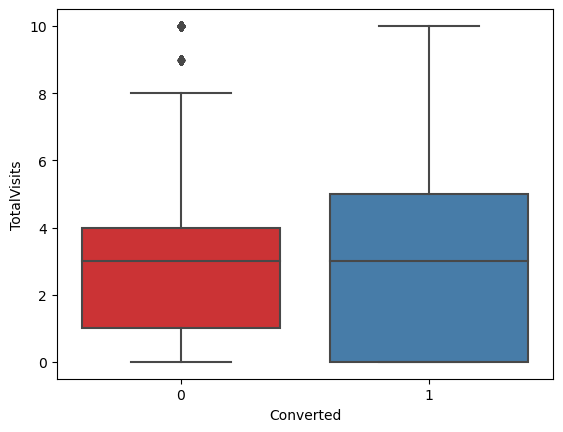

In [ ]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette='Set1')

##### 7. Total Time Spent on Website

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

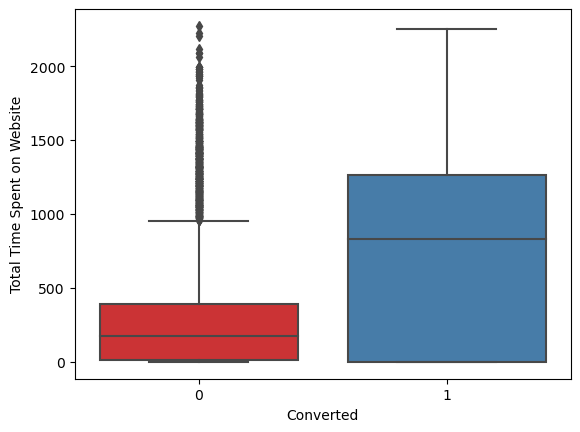

In [ ]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette='Set1')

##### 8. Page Views Per Visit

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

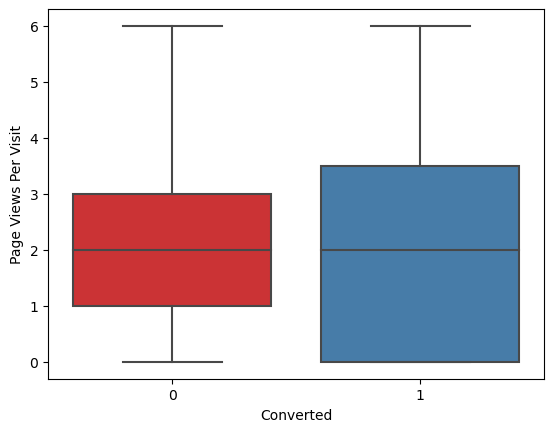

In [ ]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_df,palette='Set1')

##### 9. Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

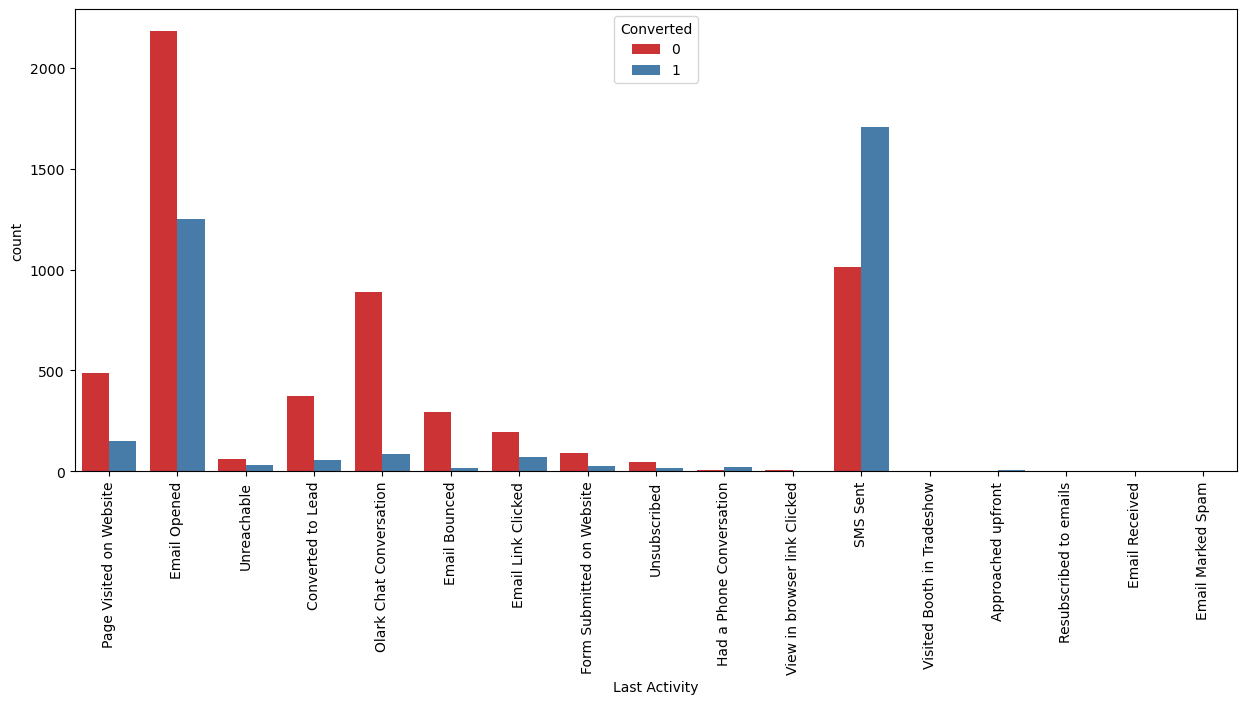

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

In [ ]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

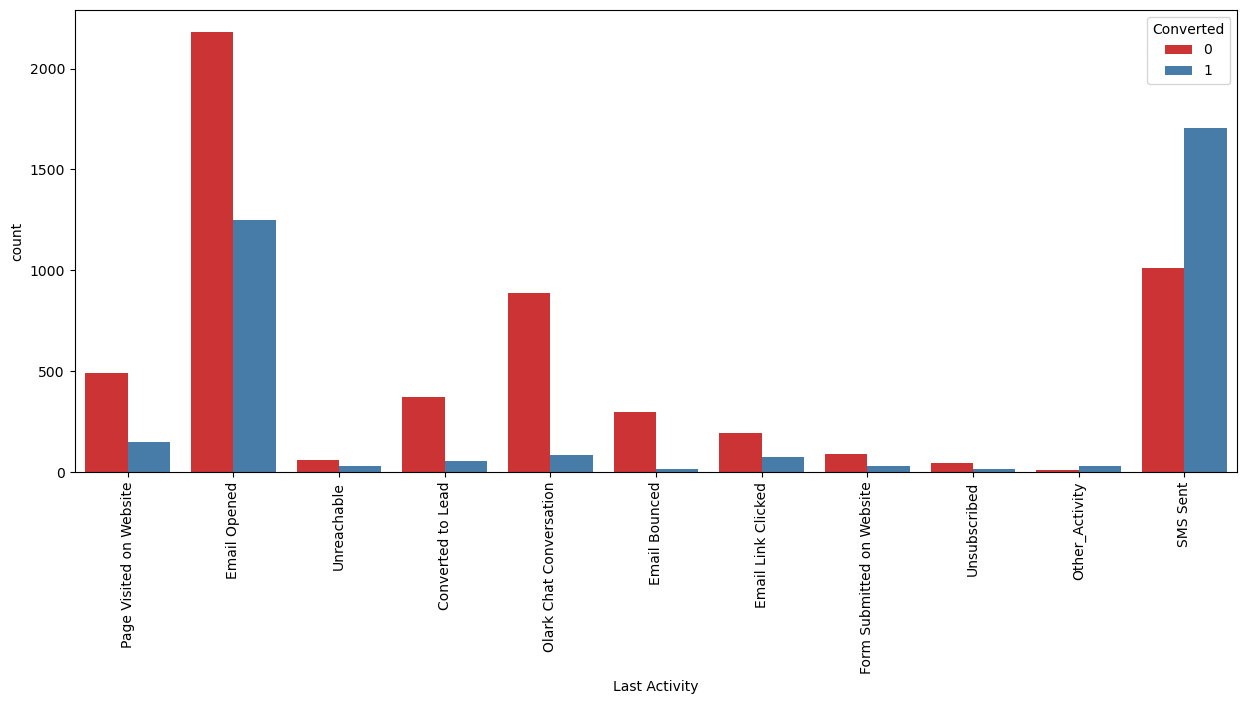

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

##### 10. Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Supply Chain Management'),
  Text(5, 0, 'IT Projects Management'),
  Text(6, 0, 'Finance Management'),
  Text(7, 0, 'Travel and Tourism'),
  Text(8, 0, 'Human Resource Management'),
  Text(9, 0, 'Marketing Management'),
  Text(10, 0, 'Banking, Investment And Insurance'),
  Text(11, 0, 'International Business'),
  Text(12, 0, 'E-COMMERCE'),
  Text(13, 0, 'Operations Management'),
  Text(14, 0, 'Retail Management'),
  Text(15, 0, 'Services Excellence'),
  Text(16, 0, 'Hospitality Management'),
  Text(17, 0, 'Rural and Agribusiness'),
  Text(18, 0, 'Healthcare Management'),
  Text(19, 0, 'E-Business')])

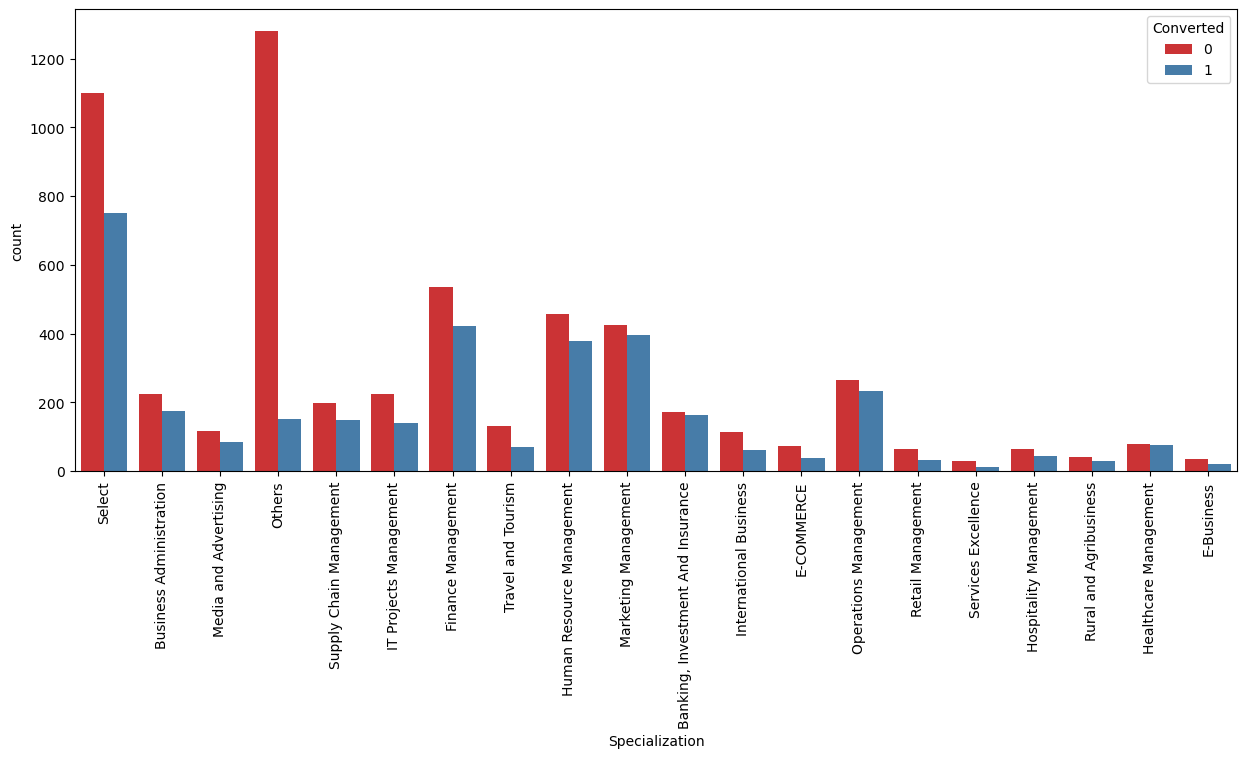

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

##### 11. City

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Thane & Outskirts'),
  Text(3, 0, 'Other Metro Cities'),
  Text(4, 0, 'Other Cities'),
  Text(5, 0, 'Other Cities of Maharashtra'),
  Text(6, 0, 'Tier II Cities')])

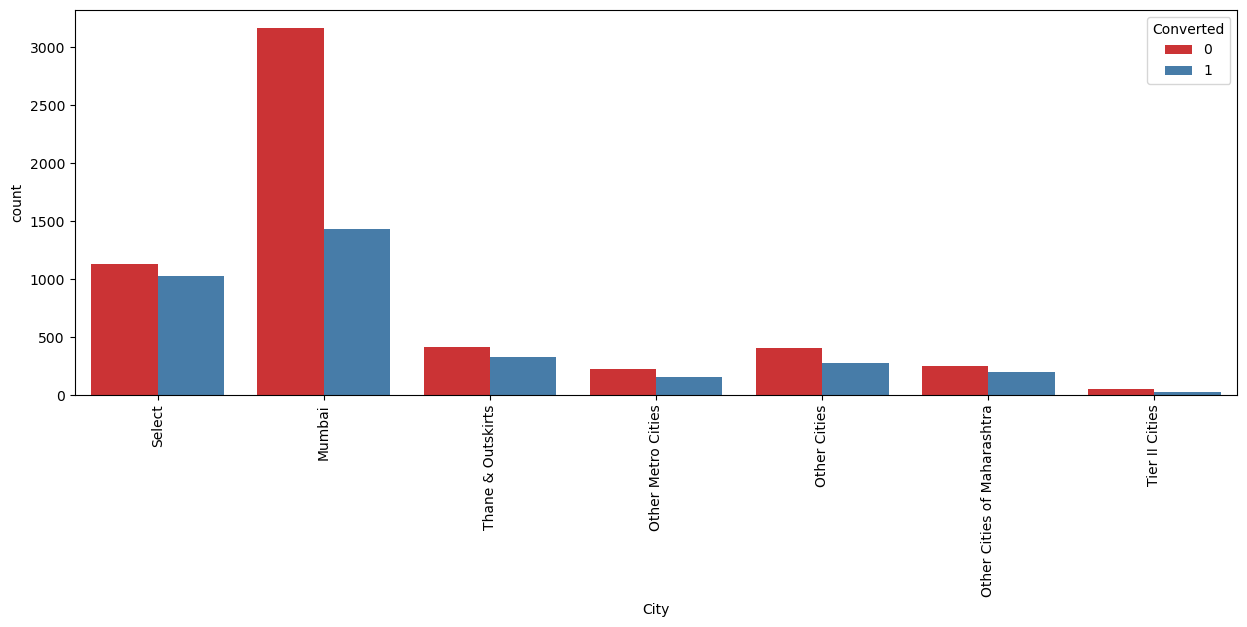

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

##### 12. Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

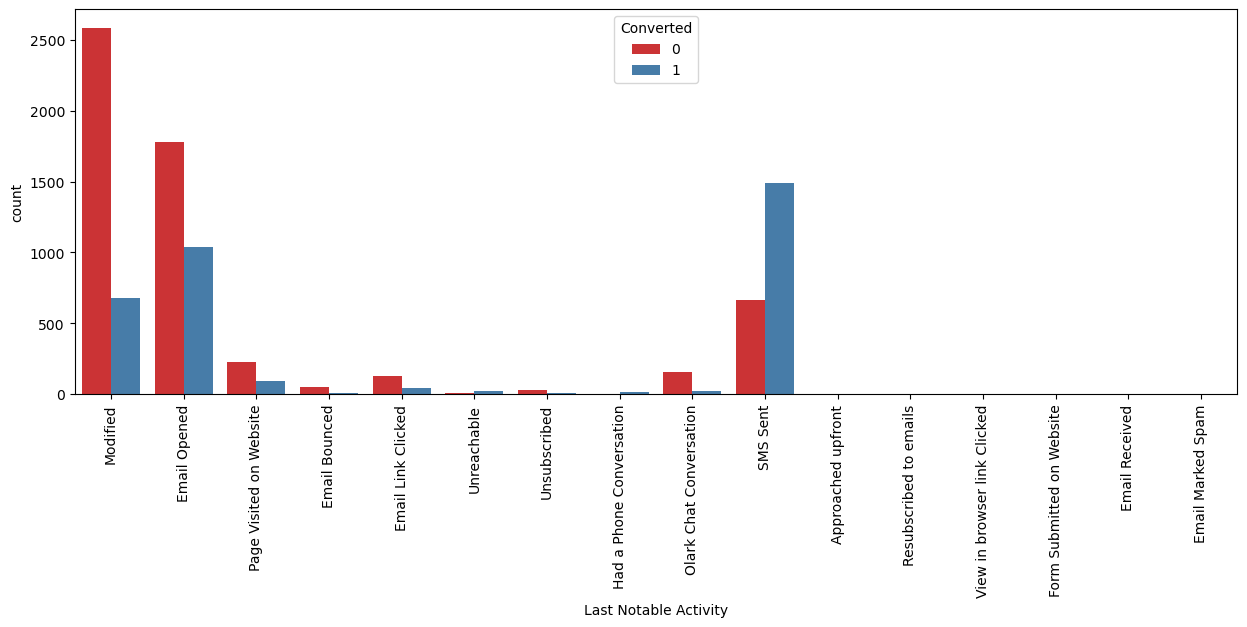

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

In [ ]:
#Based on the analysis we have seen that many columns are not adding any information to the model,
#hence we can drop them for further analysis

In [ ]:
lead_df = lead_df.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [ ]:
lead_df.shape

(9074, 13)

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9074 non-null   object 
 1   Lead Origin                  9074 non-null   object 
 2   Lead Source                  9074 non-null   object 
 3   Do Not Email                 9074 non-null   object 
 4   Do Not Call                  9074 non-null   object 
 5   Converted                    9074 non-null   int64  
 6   TotalVisits                  9074 non-null   float64
 7   Total Time Spent on Website  9074 non-null   int64  
 8   Page Views Per Visit         9074 non-null   float64
 9   Last Activity                9074 non-null   object 
 10  Specialization               9074 non-null   object 
 11  City                         9074 non-null   object 
 12  Last Notable Activity        9074 non-null   object 
dtypes: float64(2), int

## 9. Data Preparation

##### 1. Converting 'Do Not Email', 'Do Not Call' binary variables (Yes/No) to 1/0

In [ ]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[vars] = lead_df[vars].apply(binary_map)

##### 2. Creating Dummy variables for the categorical features:

In [ ]:
dummy_data = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
lead_df = pd.concat([lead_df, dummy_data], axis=1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                             'City','Last Notable Activity'], axis = 1)
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


##### 3. Splitting the data into train and test set

In [ ]:
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=100)

In [ ]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8459,0,0,0.642869,-0.151287,-0.333050,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7443,0,0,-1.146932,-0.883676,-1.261458,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7196,0,0,-0.788972,-0.724622,-0.705525,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7595,0,0,-0.431012,1.132243,-0.705525,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7956,0,0,-1.146932,-0.883676,-1.261458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 10. Feature Selection Using RFE

In [ ]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)   
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True, False, False,
        True, False,  True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Others', False, 45),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 43),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Last Activity_SMS Sent', True, 1),
 

In [ ]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'Specialization_Select',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

## 11. Model Building

##### Model 1

In [ ]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5444
Model:                            GLM   Df Residuals:                     5423
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2286.8
Date:                Sun, 21 May 2023   Deviance:                       4573.6
Time:                        08:51:40   Pearson chi2:                 5.30e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  0.2659      0.133      1.996      0.046       0.005       0.527
Do Not Email                                          -1.6966      0.233     -7.295      0.000      -2.152      -1.241
Total Time Spent on Website                            1.0842      0.043     25.407      0.000       1.001       1.168
Lead Origin_Landing Page Submission                   -1.3083      0.134     -9.732      0.000      -1.572      -1.045
Lead Origin_Lead Add Form                              0.8380      0.967      0.866      0.386      -1.058       2.734
Lead Source_Olark Chat                                 1.2002      0.134      8.952      0.000       0.937       1.463
Lead Source_Reference                                  2.5035      0.993      2.520      0.012       0.556       4.451
Lead Source_Welingak Website                           4.6646      1.211      3.853      0.000       2.292       7.038
Last Activity_Email Bounced                           -0.4580      0.506     -0.905      0.366      -1.450       0.534
Last Activity_Olark Chat Conversation                 -0.8231      0.217     -3.788      0.000      -1.249      -0.397
Last Activity_Other_Activity                           2.5607      0.538      4.757      0.000       1.506       3.616
Last Activity_SMS Sent                                 1.2410      0.082     15.051      0.000       1.079       1.403
Last Activity_Unsubscribed                             1.4280      0.469      3.044      0.002       0.508       2.348
Specialization_Others                                 -2.2781      0.173    -13.153      0.000      -2.618      -1.939
Specialization_Select                                 -1.1145      0.140     -7.987      0.000      -1.388      -0.841
Last Notable Activity_Email Link Clicked              -0.4318      0.273     -1.581      0.114      -0.967       0.104
Last Notable Activity_Modified                        -0.9399      0.091    -10.294      0.000      -1.119      -0.761
Last Notable Activity_Olark Chat Conversation         -0.7546      0.433     -1.743      0.081      -1.603       0.094
Last Notable Activity_Page Visited on Website         -0.3606      0.211     -1.710      0.087      -0.774       0.053
Last Notable Activity_Unreachable                      1.4425      0.493      2.924      0.003       0.475       2.410
Last Notable Activity_View in browser link Clicked   -22.6131   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
======================================================================================================================
"""

In [ ]:
# Since Pvalue of 'Last Notable Activity_View in browser link Clicked' is very high, we can drop this column.
# Dropping the column 'Last Notable Activity_View in browser link Clicked'
col1 = cols.drop('Last Notable Activity_View in browser link Clicked'.strip())

In [ ]:
print(col1)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'Specialization_Select',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')


##### Model 2

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5444
Model:                            GLM   Df Residuals:                     5424
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2288.9
Date:                Sun, 21 May 2023   Deviance:                       4577.7
Time:                        08:51:40   Pearson chi2:                 5.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3871
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2514      0.133      1.891      0.059      -0.009       0.512
Do Not Email                                     -1.6941      0.232     -7.290      0.000      -2.150      -1.239
Total Time Spent on Website                       1.0854      0.043     25.441      0.000       1.002       1.169
Lead Origin_Landing Page Submission              -1.2945      0.134     -9.649      0.000      -1.557      -1.032
Lead Origin_Lead Add Form                         0.8440      0.968      0.872      0.383      -1.053       2.741
Lead Source_Olark Chat                            1.2058      0.134      8.999      0.000       0.943       1.468
Lead Source_Reference                             2.5065      0.994      2.522      0.012       0.559       4.454
Lead Source_Welingak Website                      4.6601      1.211      3.848      0.000       2.287       7.034
Last Activity_Email Bounced                      -0.4619      0.506     -0.913      0.361      -1.454       0.530
Last Activity_Olark Chat Conversation            -0.8265      0.217     -3.805      0.000      -1.252      -0.401
Last Activity_Other_Activity                      2.3242      0.508      4.574      0.000       1.328       3.320
Last Activity_SMS Sent                            1.2407      0.082     15.050      0.000       1.079       1.402
Last Activity_Unsubscribed                        1.4261      0.469      3.040      0.002       0.507       2.345
Specialization_Others                            -2.2661      0.173    -13.097      0.000      -2.605      -1.927
Specialization_Select                            -1.1019      0.139     -7.910      0.000      -1.375      -0.829
Last Notable Activity_Email Link Clicked         -0.4309      0.273     -1.578      0.115      -0.966       0.104
Last Notable Activity_Modified                   -0.9354      0.091    -10.257      0.000      -1.114      -0.757
Last Notable Activity_Olark Chat Conversation    -0.7517      0.433     -1.737      0.082      -1.600       0.097
Last Notable Activity_Page Visited on Website    -0.3593      0.211     -1.704      0.088      -0.773       0.054
Last Notable Activity_Unreachable                 1.4452      0.493      2.930      0.003       0.478       2.412
=================================================================================================================
"""

In [ ]:
# Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.
# Dropping the column 'Lead Origin_Lead Add Form'
col2 = col1.drop('Lead Origin_Lead Add Form'.strip())

In [ ]:
print(col2)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Specialization_Select', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')


##### Model 3

In [ ]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5444
Model:                            GLM   Df Residuals:                     5425
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2289.3
Date:                Sun, 21 May 2023   Deviance:                       4578.5
Time:                        08:51:40   Pearson chi2:                 5.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2588      0.133      1.950      0.051      -0.001       0.519
Do Not Email                                     -1.6955      0.232     -7.296      0.000      -2.151      -1.240
Total Time Spent on Website                       1.0847      0.043     25.442      0.000       1.001       1.168
Lead Origin_Landing Page Submission              -1.3021      0.134     -9.722      0.000      -1.565      -1.040
Lead Source_Olark Chat                            1.2034      0.134      8.990      0.000       0.941       1.466
Lead Source_Reference                             3.3435      0.259     12.931      0.000       2.837       3.850
Lead Source_Welingak Website                      5.4990      0.736      7.467      0.000       4.056       6.942
Last Activity_Email Bounced                      -0.4618      0.506     -0.913      0.361      -1.453       0.530
Last Activity_Olark Chat Conversation            -0.8292      0.217     -3.818      0.000      -1.255      -0.404
Last Activity_Other_Activity                      2.3225      0.508      4.570      0.000       1.327       3.319
Last Activity_SMS Sent                            1.2415      0.082     15.061      0.000       1.080       1.403
Last Activity_Unsubscribed                        1.4263      0.469      3.041      0.002       0.507       2.346
Specialization_Others                            -2.2724      0.173    -13.143      0.000      -2.611      -1.934
Specialization_Select                            -1.1049      0.139     -7.934      0.000      -1.378      -0.832
Last Notable Activity_Email Link Clicked         -0.4316      0.273     -1.580      0.114      -0.967       0.104
Last Notable Activity_Modified                   -0.9350      0.091    -10.254      0.000      -1.114      -0.756
Last Notable Activity_Olark Chat Conversation    -0.7503      0.433     -1.733      0.083      -1.599       0.098
Last Notable Activity_Page Visited on Website    -0.3541      0.210     -1.684      0.092      -0.766       0.058
Last Notable Activity_Unreachable                 1.4439      0.493      2.927      0.003       0.477       2.411
=================================================================================================================
"""

In [ ]:
# Since Pvalue of 'Last Activity_Email Bounced' is very high, we can drop this column.
# Dropping the column 'Last Activity_Email Bounced'
col3 = col2.drop('Last Activity_Email Bounced')

##### Model 4

In [ ]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5444
Model:                            GLM   Df Residuals:                     5426
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2289.7
Date:                Sun, 21 May 2023   Deviance:                       4579.4
Time:                        08:51:41   Pearson chi2:                 5.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3869
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2561      0.133      1.931      0.053      -0.004       0.516
Do Not Email                                     -1.7955      0.208     -8.639      0.000      -2.203      -1.388
Total Time Spent on Website                       1.0854      0.043     25.458      0.000       1.002       1.169
Lead Origin_Landing Page Submission              -1.3030      0.134     -9.735      0.000      -1.565      -1.041
Lead Source_Olark Chat                            1.2031      0.134      8.988      0.000       0.941       1.465
Lead Source_Reference                             3.3539      0.259     12.967      0.000       2.847       3.861
Lead Source_Welingak Website                      5.4957      0.735      7.481      0.000       4.056       6.936
Last Activity_Olark Chat Conversation            -0.8195      0.217     -3.777      0.000      -1.245      -0.394
Last Activity_Other_Activity                      2.3349      0.508      4.592      0.000       1.338       3.331
Last Activity_SMS Sent                            1.2520      0.082     15.317      0.000       1.092       1.412
Last Activity_Unsubscribed                        1.5234      0.458      3.328      0.001       0.626       2.421
Specialization_Others                            -2.2730      0.173    -13.147      0.000      -2.612      -1.934
Specialization_Select                            -1.1072      0.139     -7.955      0.000      -1.380      -0.834
Last Notable Activity_Email Link Clicked         -0.4284      0.273     -1.568      0.117      -0.964       0.107
Last Notable Activity_Modified                   -0.9402      0.091    -10.330      0.000      -1.119      -0.762
Last Notable Activity_Olark Chat Conversation    -0.7534      0.433     -1.740      0.082      -1.602       0.095
Last Notable Activity_Page Visited on Website    -0.3463      0.210     -1.646      0.100      -0.759       0.066
Last Notable Activity_Unreachable                 1.4497      0.494      2.936      0.003       0.482       2.417
=================================================================================================================
"""

In [ ]:
# Since Pvalue of 'Last Notable Activity_Email Link Clicked' is very high, we can drop this column.
# Dropping the column 'Last Notable Activity_Email Link Clicked'
col4 = col3.drop('Last Notable Activity_Email Link Clicked')

##### Model 5

In [ ]:
X_train_sm = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5444
Model:                            GLM   Df Residuals:                     5427
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2291.0
Date:                Sun, 21 May 2023   Deviance:                       4582.0
Time:                        08:51:41   Pearson chi2:                 5.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2394      0.132      1.811      0.070      -0.020       0.499
Do Not Email                                     -1.7924      0.208     -8.621      0.000      -2.200      -1.385
Total Time Spent on Website                       1.0864      0.043     25.490      0.000       1.003       1.170
Lead Origin_Landing Page Submission              -1.3057      0.134     -9.757      0.000      -1.568      -1.043
Lead Source_Olark Chat                            1.1956      0.134      8.944      0.000       0.934       1.458
Lead Source_Reference                             3.3442      0.258     12.940      0.000       2.838       3.851
Lead Source_Welingak Website                      5.4976      0.735      7.484      0.000       4.058       6.937
Last Activity_Olark Chat Conversation            -0.8108      0.217     -3.737      0.000      -1.236      -0.386
Last Activity_Other_Activity                      2.3465      0.508      4.617      0.000       1.350       3.343
Last Activity_SMS Sent                            1.2689      0.081     15.648      0.000       1.110       1.428
Last Activity_Unsubscribed                        1.5377      0.458      3.360      0.001       0.641       2.435
Specialization_Others                            -2.2793      0.173    -13.189      0.000      -2.618      -1.941
Specialization_Select                            -1.1058      0.139     -7.949      0.000      -1.378      -0.833
Last Notable Activity_Modified                   -0.9264      0.091    -10.220      0.000      -1.104      -0.749
Last Notable Activity_Olark Chat Conversation    -0.7394      0.433     -1.707      0.088      -1.588       0.109
Last Notable Activity_Page Visited on Website    -0.3271      0.210     -1.557      0.119      -0.739       0.085
Last Notable Activity_Unreachable                 1.4702      0.494      2.977      0.003       0.502       2.438
=================================================================================================================
"""

In [ ]:
# Since Pvalue of 'Last Notable Activity_Page Visited on Website' is very high, we can drop this column.
# Dropping the column 'Last Notable Activity_Page Visited on Website'
col5 = col4.drop('Last Notable Activity_Page Visited on Website')

##### Model 6

In [ ]:
X_train_sm = sm.add_constant(X_train[col5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5444
Model:                            GLM   Df Residuals:                     5428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2292.2
Date:                Sun, 21 May 2023   Deviance:                       4584.5
Time:                        08:51:41   Pearson chi2:                 5.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3864
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2130      0.131      1.624      0.104      -0.044       0.470
Do Not Email                                     -1.8042      0.207     -8.704      0.000      -2.210      -1.398
Total Time Spent on Website                       1.0854      0.043     25.480      0.000       1.002       1.169
Lead Origin_Landing Page Submission              -1.3035      0.134     -9.741      0.000      -1.566      -1.041
Lead Source_Olark Chat                            1.2026      0.134      8.998      0.000       0.941       1.465
Lead Source_Reference                             3.3553      0.258     12.986      0.000       2.849       3.862
Lead Source_Welingak Website                      5.5029      0.735      7.490      0.000       4.063       6.943
Last Activity_Olark Chat Conversation            -0.8067      0.217     -3.718      0.000      -1.232      -0.381
Last Activity_Other_Activity                      2.3608      0.508      4.649      0.000       1.365       3.356
Last Activity_SMS Sent                            1.2898      0.080     16.114      0.000       1.133       1.447
Last Activity_Unsubscribed                        1.5693      0.457      3.436      0.001       0.674       2.465
Specialization_Others                            -2.2837      0.173    -13.212      0.000      -2.622      -1.945
Specialization_Select                            -1.1043      0.139     -7.937      0.000      -1.377      -0.832
Last Notable Activity_Modified                   -0.9084      0.090    -10.097      0.000      -1.085      -0.732
Last Notable Activity_Olark Chat Conversation    -0.7204      0.433     -1.664      0.096      -1.569       0.128
Last Notable Activity_Unreachable                 1.4949      0.494      3.029      0.002       0.527       2.462
=================================================================================================================
"""

In [ ]:
# Since Pvalue of 'Last Notable Activity_Olark Chat Conversation' is very high, we can drop this column.
# Dropping the column 'Last Notable Activity_Olark Chat Conversation'
col6 = col5.drop('Last Notable Activity_Olark Chat Conversation')

##### Model 7

In [ ]:
X_train_sm = sm.add_constant(X_train[col6])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5444
Model:                            GLM   Df Residuals:                     5429
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2293.7
Date:                Sun, 21 May 2023   Deviance:                       4587.4
Time:                        08:51:41   Pearson chi2:                 5.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2100      0.131      1.599      0.110      -0.047       0.467
Do Not Email                             -1.8113      0.207     -8.760      0.000      -2.217      -1.406
Total Time Spent on Website               1.0818      0.042     25.456      0.000       0.999       1.165
Lead Origin_Landing Page Submission      -1.3078      0.134     -9.766      0.000      -1.570      -1.045
Lead Source_Olark Chat                    1.2008      0.134      8.979      0.000       0.939       1.463
Lead Source_Reference                     3.3460      0.258     12.954      0.000       2.840       3.852
Lead Source_Welingak Website              5.4736      0.734      7.460      0.000       4.036       6.912
Last Activity_Olark Chat Conversation    -1.0007      0.192     -5.211      0.000      -1.377      -0.624
Last Activity_Other_Activity              2.3496      0.507      4.635      0.000       1.356       3.343
Last Activity_SMS Sent                    1.2918      0.080     16.157      0.000       1.135       1.448
Last Activity_Unsubscribed                1.5783      0.456      3.461      0.001       0.685       2.472
Specialization_Others                    -2.2970      0.173    -13.276      0.000      -2.636      -1.958
Specialization_Select                    -1.1077      0.139     -7.950      0.000      -1.381      -0.835
Last Notable Activity_Modified           -0.8740      0.087    -10.015      0.000      -1.045      -0.703
Last Notable Activity_Unreachable         1.5022      0.494      3.043      0.002       0.535       2.470
=========================================================================================================
"""

## 12. Checking for VIF values

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.06
12,Last Notable Activity_Modified,1.79
10,Specialization_Others,1.73
2,Lead Origin_Landing Page Submission,1.68
6,Last Activity_Olark Chat Conversation,1.62
11,Specialization_Select,1.57
8,Last Activity_SMS Sent,1.55
1,Total Time Spent on Website,1.27
0,Do Not Email,1.22
4,Lead Source_Reference,1.14


## 13. Model Evaluation

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8459    0.220719
7443    0.055051
7196    0.059766
7595    0.296899
7956    0.136799
4606    0.613411
4791    0.979998
9019    0.747149
5218    0.475763
3946    0.430773
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22071886, 0.05505084, 0.0597657 , 0.29689852, 0.13679901,
       0.61341107, 0.97999838, 0.74714923, 0.47576347, 0.43077314])

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.220719,8459
1,0,0.055051,7443
2,0,0.059766,7196
3,1,0.296899,7595
4,0,0.136799,7956


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.220719,8459,0
1,0,0.055051,7443,0
2,0,0.059766,7196,0
3,1,0.296899,7595,0
4,0,0.136799,7956,0


In [ ]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2961  401]
 [ 657 1425]]


In [ ]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8056576047024246


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:

print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.6844380403458213
Specificity :  0.880725758477097
False Positive Rate : 0.11927424152290303
Positive Predictive Value : 0.78039430449069
Negative predictive value : 0.818407960199005


## 14. Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

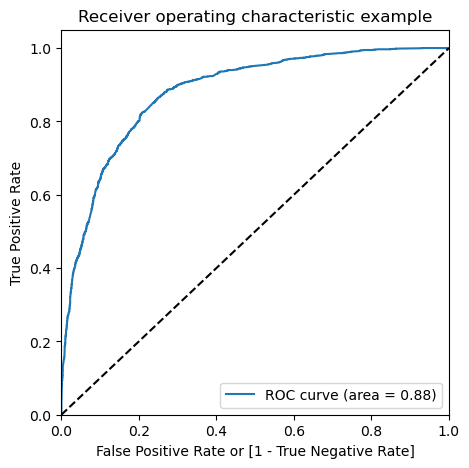

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.220719,8459,0,1,1,1,0,0,0,0,0,0,0
1,0,0.055051,7443,0,1,0,0,0,0,0,0,0,0,0
2,0,0.059766,7196,0,1,0,0,0,0,0,0,0,0,0
3,1,0.296899,7595,0,1,1,1,0,0,0,0,0,0,0
4,0,0.136799,7956,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382439  1.000000  0.000000
0.1   0.1  0.605988  0.973103  0.378644
0.2   0.2  0.751470  0.914025  0.650803
0.3   0.3  0.791514  0.871278  0.742118
0.4   0.4  0.804188  0.769933  0.825402
0.5   0.5  0.805658  0.684438  0.880726
0.6   0.6  0.797024  0.617675  0.908090
0.7   0.7  0.768736  0.490394  0.941106
0.8   0.8  0.748898  0.395293  0.967876
0.9   0.9  0.698935  0.233910  0.986913


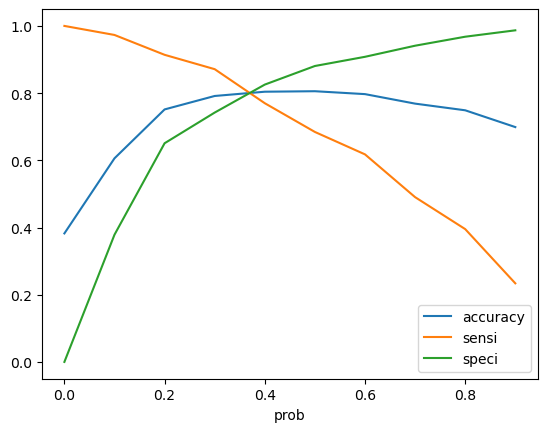

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.220719,8459,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.055051,7443,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.059766,7196,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.296899,7595,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.136799,7956,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.220719,8459,0,1,1,1,0,0,0,0,0,0,0,0,22
1,0,0.055051,7443,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.059766,7196,0,1,0,0,0,0,0,0,0,0,0,0,6
3,1,0.296899,7595,0,1,1,1,0,0,0,0,0,0,0,0,30
4,0,0.136799,7956,0,1,1,0,0,0,0,0,0,0,0,0,14


In [ ]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7957384276267451


In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2561,  801],
       [ 311, 1771]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.8506243996157541
Specificity : 0.7617489589530042
False Positive rate :  0.23825104104699585
Negative Predictive Value :  0.8917130919220055


## 15. Precision and Recall (Train Data)

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2961,  401],
       [ 657, 1425]])

In [ ]:
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.78039430449069


In [ ]:
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6844380403458213


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.78039430449069


In [ ]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6844380403458213


In [ ]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 5439    0
 5440    1
 5441    0
 5442    0
 5443    0
 Name: Converted, Length: 5444, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5439    0
 5440    1
 5441    1
 5442    0
 5443    0
 Name: predicted, Length: 5444, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

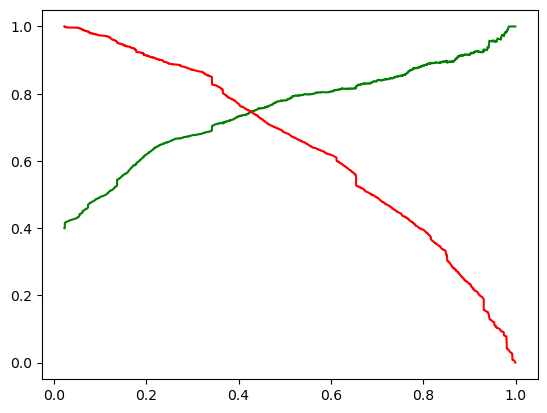

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 16. Making predictions on the test set

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
X_test = X_test[col6]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,Specialization_Select,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.593310,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.914568,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,-0.746816,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.883676,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.580363,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

3271    0.061292
1490    0.725797
7936    0.052406
4216    0.848900
3830    0.151143
1800    0.129912
6507    0.376620
4821    0.334199
4223    0.941808
4714    0.193983
dtype: float64

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

,0
3271,0.061292
1490,0.725797
7936,0.052406
4216,0.848900
3830,0.151143


In [ ]:
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df['LeadId'] = y_test_df.index

In [ ]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,LeadId,0
0,0,3271,0.061292
1,1,1490,0.725797
2,0,7936,0.052406
3,1,4216,0.848900
4,0,3830,0.151143


In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,3271,0,0.061292
1,1490,1,0.725797
2,7936,0,0.052406
3,4216,1,0.848900
4,3830,0,0.151143


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,3271,0,0.061292,0
1,1490,1,0.725797,1
2,7936,0,0.052406,0
3,4216,1,0.848900,1
4,3830,0,0.151143,0


In [ ]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7958677685950413


## 16. Precision and Recall (Test Data)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1838,  439],
       [ 302, 1051]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.7767923133776792
Specificity : 0.8072024593763725


In [ ]:
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,3271,0,0.061292,0,6
1,1490,1,0.725797,1,73
2,7936,0,0.052406,0,5
3,4216,1,0.848900,1,85
4,3830,0,0.151143,0,15
5,1800,1,0.129912,0,13
6,6507,0,0.376620,1,38
7,4821,0,0.334199,0,33
8,4223,1,0.941808,1,94
9,4714,0,0.193983,0,19


In [ ]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7053691275167785
recall  0.7767923133776792


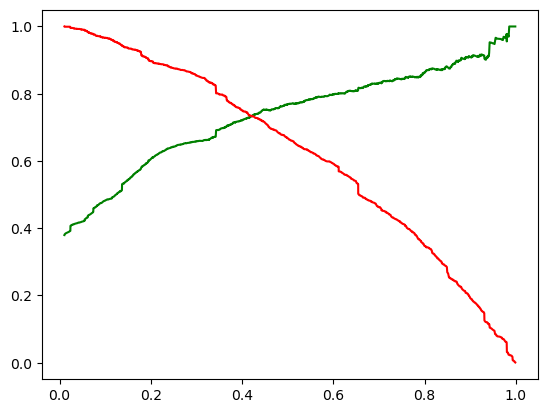

In [ ]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()